## Importing the required libraries

In [15]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [16]:
from keras import regularizers

In [17]:
import os

In [18]:
mylist= os.listdir('C:/Users/Asus/Desktop/sound/ravdess/')

In [19]:
type(mylist)

list

In [20]:
print(mylist)
print(len(mylist))

['03-01-01-01-01-01-01.wav', '03-01-01-01-01-01-02.wav', '03-01-01-01-01-01-03.wav', '03-01-01-01-01-01-04.wav', '03-01-01-01-01-01-05.wav', '03-01-01-01-01-01-06.wav', '03-01-01-01-01-01-07.wav', '03-01-01-01-01-01-08.wav', '03-01-01-01-01-01-09.wav', '03-01-01-01-01-01-10.wav', '03-01-01-01-01-01-11.wav', '03-01-01-01-01-01-12.wav', '03-01-01-01-01-01-13.wav', '03-01-01-01-01-01-14.wav', '03-01-01-01-01-01-15.wav', '03-01-01-01-01-01-16.wav', '03-01-01-01-01-01-17.wav', '03-01-01-01-01-01-18.wav', '03-01-01-01-01-01-19.wav', '03-01-01-01-01-01-20.wav', '03-01-01-01-01-01-21.wav', '03-01-01-01-01-01-22.wav', '03-01-01-01-01-01-23.wav', '03-01-01-01-01-01-24.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-01-02-02.wav', '03-01-01-01-01-02-03.wav', '03-01-01-01-01-02-04.wav', '03-01-01-01-01-02-05.wav', '03-01-01-01-01-02-06.wav', '03-01-01-01-01-02-07.wav', '03-01-01-01-01-02-08.wav', '03-01-01-01-01-02-09.wav', '03-01-01-01-01-02-10.wav', '03-01-01-01-01-02-11.wav', '03-01-01-01-01-02-

In [21]:
print(mylist[6:-16])
print(len(mylist[6:-16]))

['03-01-01-01-01-01-07.wav', '03-01-01-01-01-01-08.wav', '03-01-01-01-01-01-09.wav', '03-01-01-01-01-01-10.wav', '03-01-01-01-01-01-11.wav', '03-01-01-01-01-01-12.wav', '03-01-01-01-01-01-13.wav', '03-01-01-01-01-01-14.wav', '03-01-01-01-01-01-15.wav', '03-01-01-01-01-01-16.wav', '03-01-01-01-01-01-17.wav', '03-01-01-01-01-01-18.wav', '03-01-01-01-01-01-19.wav', '03-01-01-01-01-01-20.wav', '03-01-01-01-01-01-21.wav', '03-01-01-01-01-01-22.wav', '03-01-01-01-01-01-23.wav', '03-01-01-01-01-01-24.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-01-02-02.wav', '03-01-01-01-01-02-03.wav', '03-01-01-01-01-02-04.wav', '03-01-01-01-01-02-05.wav', '03-01-01-01-01-02-06.wav', '03-01-01-01-01-02-07.wav', '03-01-01-01-01-02-08.wav', '03-01-01-01-01-02-09.wav', '03-01-01-01-01-02-10.wav', '03-01-01-01-01-02-11.wav', '03-01-01-01-01-02-12.wav', '03-01-01-01-01-02-13.wav', '03-01-01-01-01-02-14.wav', '03-01-01-01-01-02-15.wav', '03-01-01-01-01-02-16.wav', '03-01-01-01-01-02-17.wav', '03-01-01-01-01-02-

## Plotting the audio file's waveform and its spectrogram

In [9]:
data, sampling_rate = librosa.load('C:/Users/Asus/Desktop/sound/ravdess/03-01-02-01-02-01-01.wav')

Populating the interactive namespace from numpy and matplotlib


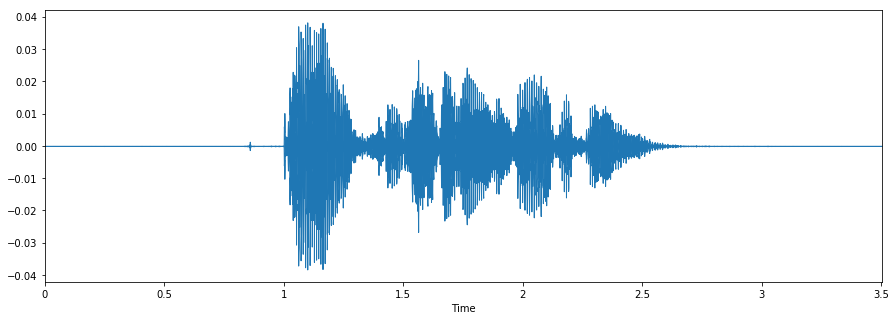

In [10]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


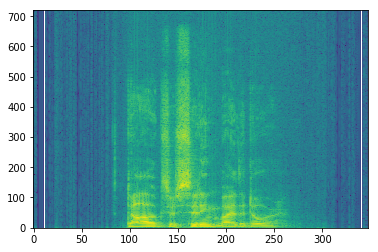

In [11]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('C:/Users/Asus/Desktop/sound/ravdess/03-01-02-01-02-01-01.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

## Setting the labels

In [12]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

In [13]:
labels = pd.DataFrame(feeling_list)

In [14]:
labels[:10]

,0
0,male_calm
1,female_calm
2,male_calm
3,female_calm
4,male_calm
5,female_calm
6,male_calm
7,female_calm
8,male_calm
9,female_calm


## Getting the features of audio files using librosa

In [15]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('C:/Users/Asus/Desktop/sound/ravdess/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [16]:
df[:5]

,feature
0,"[-70.2677641610773, -70.2677641610773, -70.267..."
1,"[-65.70765240065282, -65.70765240065282, -63.1..."
2,"[-65.4824988827423, -65.4824988827423, -65.482..."
3,"[-64.52844910346735, -64.52844910346735, -64.5..."
4,"[-62.36431052745468, -59.93472513811134, -61.8..."


In [17]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [18]:
newdf = pd.concat([df3,labels], axis=1)

In [19]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [20]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,...,-57.447461,-58.896493,-58.751002,-57.405669,-60.078475,-63.426811,-62.638537,-61.082741,-60.234652,male_calm
1,-65.707652,-65.707652,-63.114722,-61.518999,-61.097138,-63.424602,-63.720067,-56.854608,-55.168972,-54.640002,...,-39.792147,-40.613166,-41.209201,-41.439204,-43.994282,-49.399616,-50.591601,-49.144064,-48.705645,female_calm
2,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,...,-31.346553,-34.310774,-35.800705,-35.936112,-37.631846,-40.119408,-41.662903,-41.323644,-40.710780,male_calm
3,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-65.928222,...,-48.674306,-48.596082,-47.602751,-43.049195,-42.659546,-43.188561,-44.001237,-43.610100,-44.698259,female_calm
4,-62.364311,-59.934725,-61.869600,-67.495764,-71.071811,-65.679826,-63.394396,-65.503349,-61.856639,-60.005421,...,-39.071328,-41.897121,-40.865430,-38.290605,-36.372397,-37.915779,-40.026125,-43.383777,-43.965398,male_calm


In [21]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
270,-51.123276,-51.818782,-51.941592,-52.816664,-54.652136,-56.915060,-57.323525,-56.916718,-54.595758,-54.187025,...,-50.799301,-50.775673,-51.096929,-51.170862,-50.121700,-49.047896,-49.425883,-50.382450,-53.368919,male_happy
837,-46.549754,-49.894717,-52.149974,-53.195930,-53.348468,-52.534322,-51.635080,-50.806060,-49.999857,-50.401288,...,-49.673718,-48.065058,-48.738222,-52.110374,-53.139163,-53.865706,-51.622978,-51.382256,-52.000805,female_fearful
202,-55.170766,-54.091945,-53.982775,-55.601245,-55.569988,-56.416959,-53.709351,-53.147567,-53.645656,-53.937560,...,-55.630552,-53.094554,-51.176641,-51.683450,-51.552548,-54.197224,-55.511977,-56.755940,-52.897683,male_happy
254,-53.306463,-51.239163,-50.094650,-49.656697,-49.566960,-51.290115,-51.009070,-52.172467,-51.246127,-51.016875,...,-54.062665,-53.672133,-55.368527,-57.059317,-57.773795,-57.758714,-57.601852,-56.696124,-58.832737,male_happy
688,-45.118827,-45.626779,-46.453797,-46.066236,-45.372249,-45.228438,-45.857828,-46.304233,-45.621753,-45.251743,...,-43.343411,-43.254208,-44.028551,-44.775207,-44.629168,-44.063613,-44.766428,-44.791992,-43.246068,male_angry
945,-51.079833,-51.018193,-52.111448,-53.815914,-50.711353,-49.507688,-50.742249,-51.723229,-51.633002,-52.000904,...,-38.565667,-39.543277,-39.507603,-39.206800,-38.964500,-40.819597,-41.819613,-42.651650,-38.605964,female_fearful
427,-81.763421,-81.763421,-81.763421,-81.763421,-81.763421,-81.763421,-81.763421,-81.763421,-81.763421,-81.763421,...,-62.243489,-63.986630,-64.047583,-63.637766,-61.677869,-59.691170,-60.302013,-62.250902,-63.875777,female_sad
539,-52.150201,-52.054038,-52.210037,-52.210308,-52.117225,-52.057665,-52.019825,-52.019825,-52.019825,-52.019825,...,-47.654898,-47.466899,-47.735275,-48.166131,-47.081075,-46.531241,-45.782631,-46.428393,-46.711735,female_sad
699,-46.685424,-46.685424,-46.685424,-46.685424,-46.685424,-46.685424,-46.685424,-46.685424,-46.685424,-46.685424,...,-39.778313,-39.900132,-39.876152,-41.675110,-43.001272,-44.506879,-45.370071,-46.626226,-46.543607,female_angry
567,-62.068012,-62.068012,-62.068012,-62.068012,-62.068012,-62.068012,-62.068012,-62.068012,-62.068012,-62.068012,...,-42.724933,-42.037570,-40.283761,-41.199850,-42.251478,-43.386018,-42.412434,-41.230543,-41.155719,female_sad


In [22]:
rnewdf=rnewdf.fillna(0)

## Dividing the data into test and train

In [23]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [24]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
415,-54.541562,-52.652206,-52.555295,-53.107349,-53.001784,-52.325148,-51.463902,-53.362503,-53.288201,-54.680249,...,-54.983267,-55.473413,-54.866709,-58.022633,-57.014260,-52.991421,-52.545435,-53.893303,-55.545372,female_sad
789,-57.412366,-57.548546,-57.750025,-56.211794,-56.767336,-56.399061,-53.960328,-54.824063,-55.214146,-55.347130,...,-55.092095,-55.213920,-55.563012,-56.563777,-55.740513,-54.276246,-53.165107,-54.771093,-58.485794,female_fearful
201,-48.981466,-47.696597,-47.206740,-48.770675,-46.975942,-46.064501,-45.844486,-45.215074,-46.174046,-46.502808,...,-48.041735,-47.311513,-48.412880,-48.155535,-44.662251,-45.211056,-47.680673,-48.981466,-48.981466,female_happy
123,-62.435233,-60.987809,-60.403913,-60.022330,-59.200268,-59.942170,-59.997592,-58.442884,-58.532731,-60.239300,...,-52.922695,-51.896186,-54.785357,-56.142794,-53.869643,-54.963020,-55.977473,-57.662542,-56.375559,female_calm
531,-46.956480,-46.956480,-46.956480,-46.956480,-46.956480,-46.956480,-46.956480,-46.956480,-46.956480,-46.956480,...,-46.956480,-46.956480,-46.956480,-46.956480,-46.956480,-46.956480,-46.956480,-46.956480,-46.956480,female_sad
892,-42.857392,-40.275680,-40.181031,-40.028477,-41.299370,-40.615974,-38.716585,-37.227968,-36.882041,-37.313021,...,-47.782886,-48.033005,-48.330319,-48.191405,-49.559215,-49.631744,-49.046684,-48.784786,-48.677354,male_fearful
94,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,...,-23.274047,-23.532521,-24.240024,-25.887856,-26.925746,-26.725288,-27.133949,-28.466279,-29.287304,male_calm
327,-46.347106,-46.246837,-45.996472,-44.776026,-45.289639,-45.422090,-45.451222,-45.464016,-44.892429,-44.306668,...,-46.141004,-45.727310,-45.307131,-45.738335,-46.089907,-46.238080,-45.708989,-45.227496,-46.238080,female_happy
276,-62.430162,-61.890209,-59.801767,-60.353930,-60.058773,-60.072021,-60.970773,-62.690823,-62.405864,-62.465799,...,-54.385944,-55.304028,-58.207417,-58.249243,-58.344151,-57.103423,-57.147382,-59.231643,-63.969559,male_happy
373,-49.293989,-49.293989,-49.293989,-49.293989,-49.293989,-49.293989,-49.901525,-47.674548,-47.494465,-48.012449,...,-48.483345,-47.690676,-47.637388,-48.026478,-46.827870,-46.361959,-47.048227,-46.011453,-46.312946,female_happy


In [25]:
trainfeatures = train.iloc[:, :-1]

In [26]:
trainlabel = train.iloc[:, -1:]

In [27]:
testfeatures = test.iloc[:, :-1]

In [28]:
testlabel = test.iloc[:, -1:]

In [29]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [31]:
X_train.shape

(769, 216)

## Changing dimension for CNN model

In [32]:

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [33]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

W1107 15:26:41.455252  4068 deprecation_wrapper.py:119] From C:\Users\Asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1107 15:26:42.545853  4068 deprecation_wrapper.py:119] From C:\Users\Asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1107 15:26:42.586456  4068 deprecation_wrapper.py:119] From C:\Users\Asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1107 15:26:42.765788  4068 deprecation_wrapper.py:119] From C:\Users\Asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1107 15:26:42.785799  4068 deprecation.py:506] Fr

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 128)          768       
_________________________________________________________________
activation_1 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          82048     
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)           82048     
__________

In [35]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

W1107 15:27:38.356438  4068 deprecation_wrapper.py:119] From C:\Users\Asus\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1107 15:27:38.378400  4068 deprecation_wrapper.py:119] From C:\Users\Asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [38]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=1000, validation_data=(x_testcnn, y_test))

W1107 15:29:10.838302  4068 deprecation.py:323] From C:\Users\Asus\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 769 samples, validate on 191 samples
Epoch 1/1000
769/769 [==============================] - 5s 6ms/step - loss: 2.7009 - acc: 0.1092 - val_loss: 2.3671 - val_acc: 0.1047
Epoch 2/1000
769/769 [==============================] - 3s 4ms/step - loss: 2.4204 - acc: 0.0949 - val_loss: 2.3115 - val_acc: 0.0995
Epoch 3/1000
769/769 [==============================] - 3s 3ms/step - loss: 2.3439 - acc: 0.1222 - val_loss: 2.2940 - val_acc: 0.1361
Epoch 4/1000
769/769 [==============================] - 3s 4ms/step - loss: 2.3228 - acc: 0.1144 - val_loss: 2.2882 - val_acc: 0.1466
Epoch 5/1000
769/769 [==============================] - 3s 4ms/step - loss: 2.2844 - acc: 0.1391 - val_loss: 2.2780 - val_acc: 0.1047
Epoch 6/1000
769/769 [==============================] - 3s 4ms/step - loss: 2.2909 - acc: 0.1274 - val_loss: 2.2712 - val_acc: 0.0838
Epoch 7/1000
769/769 [==============================] - 3s 4ms/step - loss: 2.2903 - acc: 0.1261 - val_loss: 2.2544 - val_acc: 0.1518
Epoch 8/1000
769

769/769 [==============================] - 3s 4ms/step - loss: 1.4673 - acc: 0.4434 - val_loss: 1.5489 - val_acc: 0.4188
Epoch 122/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.4583 - acc: 0.4655 - val_loss: 1.6037 - val_acc: 0.3927
Epoch 123/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.4657 - acc: 0.4291 - val_loss: 1.5379 - val_acc: 0.4136
Epoch 124/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.4686 - acc: 0.4473 - val_loss: 1.5249 - val_acc: 0.4241
Epoch 125/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.4879 - acc: 0.4460 - val_loss: 1.5811 - val_acc: 0.3770
Epoch 126/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.4722 - acc: 0.4161 - val_loss: 1.7864 - val_acc: 0.3194
Epoch 127/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.5001 - acc: 0.4213 - val_loss: 1.5471 - val_acc: 0.4188
Epoch 128/1000
769/769 [==============================] - 3s 4m

769/769 [==============================] - 3s 4ms/step - loss: 1.2294 - acc: 0.5488 - val_loss: 1.4021 - val_acc: 0.4555
Epoch 242/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.2253 - acc: 0.5527 - val_loss: 1.4032 - val_acc: 0.4503
Epoch 243/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.2610 - acc: 0.5189 - val_loss: 1.4089 - val_acc: 0.4607
Epoch 244/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.2219 - acc: 0.5345 - val_loss: 1.4166 - val_acc: 0.4346
Epoch 245/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.2437 - acc: 0.5228 - val_loss: 1.4472 - val_acc: 0.4450
Epoch 246/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.2250 - acc: 0.5332 - val_loss: 1.4272 - val_acc: 0.4450
Epoch 247/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.2379 - acc: 0.5202 - val_loss: 1.4463 - val_acc: 0.4450
Epoch 248/1000
769/769 [==============================] - 3s 4m

Epoch 301/1000
769/769 [==============================] - 3s 3ms/step - loss: 1.1244 - acc: 0.5787 - val_loss: 1.3890 - val_acc: 0.4555
Epoch 302/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.1575 - acc: 0.5540 - val_loss: 1.4333 - val_acc: 0.4660
Epoch 303/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.1294 - acc: 0.5787 - val_loss: 1.4842 - val_acc: 0.4450
Epoch 304/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.1558 - acc: 0.5800 - val_loss: 1.4027 - val_acc: 0.4660
Epoch 305/1000
769/769 [==============================] - 3s 4ms/step - loss: 1.1270 - acc: 0.5891 - val_loss: 1.3772 - val_acc: 0.4555
Epoch 306/1000
769/769 [==============================] - 3s 3ms/step - loss: 1.1355 - acc: 0.5670 - val_loss: 1.3741 - val_acc: 0.4817
Epoch 307/1000
769/769 [==============================] - 3s 3ms/step - loss: 1.1368 - acc: 0.5696 - val_loss: 1.3918 - val_acc: 0.4607
Epoch 308/1000
769/769 [========================

769/769 [==============================] - 3s 4ms/step - loss: 0.9510 - acc: 0.6450 - val_loss: 1.3857 - val_acc: 0.4346
Epoch 422/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.9780 - acc: 0.6268 - val_loss: 1.3643 - val_acc: 0.4607
Epoch 423/1000
769/769 [==============================] - ETA: 0s - loss: 0.9905 - acc: 0.644 - 3s 4ms/step - loss: 0.9896 - acc: 0.6450 - val_loss: 1.3742 - val_acc: 0.4712
Epoch 424/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.9848 - acc: 0.6320 - val_loss: 1.4002 - val_acc: 0.4398
Epoch 425/1000
769/769 [==============================] - 2s 3ms/step - loss: 0.9716 - acc: 0.6489 - val_loss: 1.3488 - val_acc: 0.4660
Epoch 426/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.9631 - acc: 0.6346 - val_loss: 1.3982 - val_acc: 0.4607
Epoch 427/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.9670 - acc: 0.6450 - val_loss: 1.3632 - val_acc: 0.4660
Epoch 428/1000
769/769 [=

769/769 [==============================] - 2s 3ms/step - loss: 0.7966 - acc: 0.7217 - val_loss: 1.4763 - val_acc: 0.4764
Epoch 541/1000
769/769 [==============================] - 2s 3ms/step - loss: 0.8101 - acc: 0.7204 - val_loss: 1.3841 - val_acc: 0.4555
Epoch 542/1000
769/769 [==============================] - 2s 3ms/step - loss: 0.8026 - acc: 0.7178 - val_loss: 1.3953 - val_acc: 0.4764
Epoch 543/1000
769/769 [==============================] - 3s 3ms/step - loss: 0.7852 - acc: 0.7360 - val_loss: 1.4434 - val_acc: 0.4712
Epoch 544/1000
769/769 [==============================] - 3s 3ms/step - loss: 0.7943 - acc: 0.7230 - val_loss: 1.3780 - val_acc: 0.4764
Epoch 545/1000
769/769 [==============================] - 3s 3ms/step - loss: 0.7885 - acc: 0.7269 - val_loss: 1.3836 - val_acc: 0.4660
Epoch 546/1000
769/769 [==============================] - 3s 3ms/step - loss: 0.7815 - acc: 0.7217 - val_loss: 1.5616 - val_acc: 0.4503
Epoch 547/1000
769/769 [==============================] - 2s 3m

769/769 [==============================] - 3s 3ms/step - loss: 0.6226 - acc: 0.7776 - val_loss: 1.5328 - val_acc: 0.4346
Epoch 661/1000
769/769 [==============================] - 2s 3ms/step - loss: 0.6360 - acc: 0.7802 - val_loss: 1.4661 - val_acc: 0.4869
Epoch 662/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.6378 - acc: 0.7919 - val_loss: 1.4843 - val_acc: 0.4450
Epoch 663/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.6249 - acc: 0.7906 - val_loss: 1.4820 - val_acc: 0.4712
Epoch 664/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.6455 - acc: 0.7789 - val_loss: 1.5193 - val_acc: 0.4346
Epoch 665/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.6234 - acc: 0.7750 - val_loss: 1.5235 - val_acc: 0.4398
Epoch 666/1000
769/769 [==============================] - 3s 3ms/step - loss: 0.6250 - acc: 0.7776 - val_loss: 1.6304 - val_acc: 0.4241
Epoch 667/1000
769/769 [==============================] - 2s 3m

769/769 [==============================] - 3s 3ms/step - loss: 0.4793 - acc: 0.8453 - val_loss: 1.6544 - val_acc: 0.4450
Epoch 781/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.4880 - acc: 0.8362 - val_loss: 1.6038 - val_acc: 0.4869
Epoch 782/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.4867 - acc: 0.8479 - val_loss: 1.6575 - val_acc: 0.4764
Epoch 783/1000
769/769 [==============================] - ETA: 0s - loss: 0.4858 - acc: 0.842 - 3s 4ms/step - loss: 0.4853 - acc: 0.8427 - val_loss: 1.6264 - val_acc: 0.4450
Epoch 784/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.4922 - acc: 0.8414 - val_loss: 1.5762 - val_acc: 0.4660
Epoch 785/1000
769/769 [==============================] - 2s 3ms/step - loss: 0.4713 - acc: 0.8479 - val_loss: 1.6287 - val_acc: 0.4817
Epoch 786/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.5168 - acc: 0.8270 - val_loss: 1.6057 - val_acc: 0.4503
Epoch 787/1000
769/769 [=

769/769 [==============================] - 3s 4ms/step - loss: 0.4389 - acc: 0.8531 - val_loss: 1.6977 - val_acc: 0.4607
Epoch 841/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.4310 - acc: 0.8622 - val_loss: 1.7691 - val_acc: 0.4607
Epoch 842/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.4142 - acc: 0.8609 - val_loss: 1.6281 - val_acc: 0.4607
Epoch 843/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.4425 - acc: 0.8596 - val_loss: 1.6775 - val_acc: 0.4712
Epoch 844/1000
769/769 [==============================] - 3s 3ms/step - loss: 0.4149 - acc: 0.8661 - val_loss: 1.6939 - val_acc: 0.4346
Epoch 845/1000
769/769 [==============================] - 3s 3ms/step - loss: 0.4072 - acc: 0.8713 - val_loss: 1.6985 - val_acc: 0.4660
Epoch 846/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.3972 - acc: 0.8830 - val_loss: 1.6965 - val_acc: 0.4712
Epoch 847/1000
769/769 [==============================] - 3s 3m

769/769 [==============================] - 3s 4ms/step - loss: 0.3428 - acc: 0.8895 - val_loss: 1.7229 - val_acc: 0.4817
Epoch 901/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.3581 - acc: 0.8739 - val_loss: 1.7490 - val_acc: 0.4607
Epoch 902/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.3455 - acc: 0.8856 - val_loss: 1.7407 - val_acc: 0.4503
Epoch 903/1000
769/769 [==============================] - 3s 3ms/step - loss: 0.3397 - acc: 0.9012 - val_loss: 1.7188 - val_acc: 0.4450
Epoch 904/1000
769/769 [==============================] - 3s 3ms/step - loss: 0.3389 - acc: 0.8960 - val_loss: 1.7246 - val_acc: 0.4869
Epoch 905/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.3446 - acc: 0.8960 - val_loss: 1.8640 - val_acc: 0.4555
Epoch 906/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.3505 - acc: 0.8739 - val_loss: 1.8535 - val_acc: 0.4607
Epoch 907/1000
769/769 [==============================] - 3s 4m

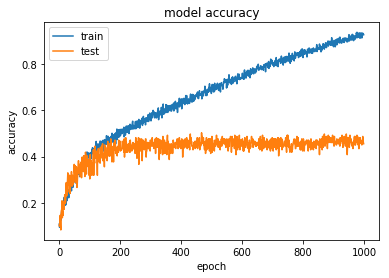

In [39]:
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [40]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\Asus\Desktop\Speech-Emotion-Analyzer-master\saved_models\Emotion_Voice_Detection_Model.h5 


In [41]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Loading the model

In [42]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 45.55%


## Predicting emotions on the test data

In [43]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

191/191 [==============================] - 0s 2ms/step


In [44]:
preds

array([[6.9572496e-05, 8.6987810e-04, 9.1002175e-06, ..., 2.3448586e-02,
        1.1959251e-01, 6.7961442e-01],
       [2.2358920e-06, 1.3981662e-10, 1.9630302e-12, ..., 2.4250714e-02,
        1.2884248e-02, 1.2014956e-03],
       [9.2976791e-01, 2.4440210e-02, 5.1027082e-04, ..., 7.4628973e-05,
        3.1104941e-05, 3.6476490e-06],
       ...,
       [5.0646585e-01, 3.8766778e-01, 1.4453339e-03, ..., 3.1164489e-04,
        8.4270368e-04, 2.2690916e-05],
       [3.8521847e-04, 5.3484362e-01, 6.3120810e-06, ..., 5.4900181e-02,
        3.0547476e-01, 7.3431460e-03],
       [2.1111970e-03, 9.2916864e-01, 5.0724447e-03, ..., 1.8856037e-04,
        6.9844665e-04, 7.9937323e-05]], dtype=float32)

In [45]:
preds1=preds.argmax(axis=1)

In [46]:
preds1

array([9, 5, 0, 7, 7, 6, 0, 8, 3, 5, 6, 6, 5, 5, 5, 1, 3, 2, 3, 6, 7, 2,
       7, 2, 1, 4, 9, 7, 5, 0, 9, 9, 5, 1, 8, 9, 4, 2, 0, 8, 2, 0, 4, 0,
       2, 3, 0, 4, 2, 0, 6, 5, 5, 1, 0, 0, 3, 1, 9, 2, 7, 3, 6, 0, 1, 4,
       6, 7, 0, 8, 5, 7, 6, 4, 6, 7, 9, 7, 0, 8, 4, 4, 0, 6, 2, 8, 2, 1,
       3, 4, 4, 0, 5, 5, 5, 5, 8, 4, 7, 9, 9, 2, 0, 5, 7, 5, 7, 3, 9, 7,
       5, 3, 1, 5, 0, 2, 3, 9, 7, 0, 4, 4, 4, 0, 9, 7, 7, 0, 6, 1, 0, 7,
       1, 6, 5, 0, 2, 8, 0, 0, 6, 1, 4, 1, 5, 5, 5, 0, 4, 9, 1, 5, 5, 0,
       9, 8, 7, 9, 8, 0, 6, 4, 3, 7, 5, 2, 0, 3, 0, 2, 5, 7, 2, 2, 7, 7,
       1, 8, 9, 6, 0, 1, 7, 7, 0, 3, 3, 1, 0, 1, 1], dtype=int64)

In [47]:
abc = preds1.astype(int).flatten()

In [48]:
predictions = (lb.inverse_transform((abc)))

In [49]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_sad
1,male_angry
2,female_angry
3,male_fearful
4,male_fearful
5,male_calm
6,female_angry
7,male_happy
8,female_happy
9,male_angry


In [50]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [51]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_happy
1,male_angry
2,female_sad
3,male_fearful
4,male_fearful
5,male_calm
6,male_angry
7,female_angry
8,female_happy
9,male_happy


In [52]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [53]:
finaldf[170:180]

,actualvalues,predictedvalues
170,male_calm,male_angry
171,male_happy,male_fearful
172,female_happy,female_fearful
173,female_fearful,female_fearful
174,male_happy,male_fearful
175,male_fearful,male_fearful
176,female_sad,female_calm
177,male_sad,male_happy
178,male_happy,male_sad
179,male_calm,male_calm


In [54]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,18
female_calm,24
female_fearful,16
female_happy,18
female_sad,15
male_angry,19
male_calm,20
male_fearful,26
male_happy,13


In [55]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,32
female_calm,18
female_fearful,17
female_happy,14
female_sad,17
male_angry,26
male_calm,15
male_fearful,25
male_happy,11


In [56]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

In [57]:
# get the file through api (listening on a specific port)

In [58]:
data, sampling_rate = librosa.load('output10.wav')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Asus\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


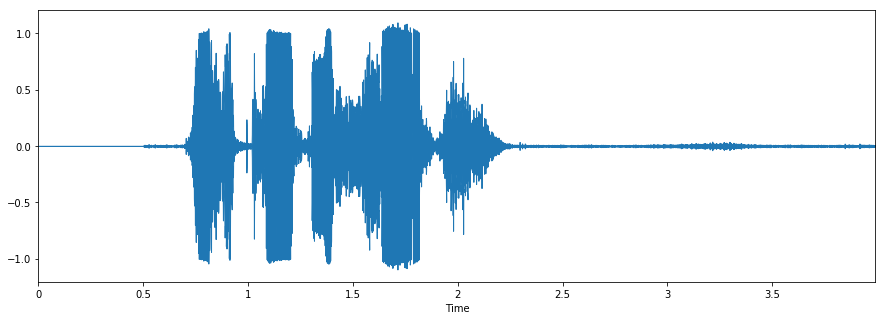

In [59]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [60]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [61]:
livedf2= pd.DataFrame(data=livedf2)

In [62]:
livedf2 = livedf2.stack().to_frame().T

In [63]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-18.203564,-21.471836,-22.52221,-21.712259,-22.264288,-20.707904,-21.726444,-21.76865,-24.302736,-22.250634,...,-24.273819,-24.639939,-24.929152,-24.43919,-25.210171,-24.740646,-22.311913,-22.579805,-22.31466,-21.552436


In [64]:
twodim= np.expand_dims(livedf2, axis=2)

In [65]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 6ms/step


In [77]:
livepreds

array([[1.2267017e-04, 2.9232218e-14, 2.6541478e-09, 2.3469728e-09,
        5.8858031e-12, 9.9786854e-01, 5.1771021e-08, 2.0079226e-03,
        2.6303931e-07, 5.6876507e-07]], dtype=float32)

In [82]:
livepreds1=livepreds.argmax(axis=1)

In [83]:
liveabc = livepreds1.astype(int).flatten()

In [85]:
livepredictions = (lb.inverse_transform((liveabc)))
print(livepredictions)




['male_angry']


In [ ]:
#api response 